In [52]:
from tqdm import tqdm
from datetime import datetime, date
import pandas as pd
from huggingface_hub import list_models

import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
def convert_to_date(timestamp):
    return datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S.%fZ').date()

In [10]:
llm_models = []
other_models = []
for model in tqdm(list_models()):
    if ('text-generation' in model.tags or 'summarization' in model.tags or 'conversational' in model.tags) and 'region:us' in model.tags:
        llm_models.append(model)
    else:
        other_models.append(model)

417422it [00:52, 7909.15it/s] 


In [36]:
llm_creation_dates = [convert_to_date(m.createdAt) for m in llm_models]
other_creation_dates = [convert_to_date(m.createdAt) for m in other_models]

In [37]:
llm_creation_date_pd = pd.DataFrame(llm_creation_dates, columns=['creation_date'])
other_creation_date_pd = pd.DataFrame(other_creation_dates, columns=['creation_date'])

In [38]:
llm_creation_date_pd['type'] = 'llm'
other_creation_date_pd['type'] = 'other'

In [39]:
cutoff_date = date(2022, 3, 2)

In [40]:
llm_creation_date_pd = llm_creation_date_pd[llm_creation_date_pd.creation_date > cutoff_date]
other_creation_date_pd = other_creation_date_pd[other_creation_date_pd.creation_date > cutoff_date]

In [41]:
llm_creation_date_pd.creation_date = llm_creation_date_pd.creation_date.apply(lambda date: date.replace(day=1))
other_creation_date_pd.creation_date = other_creation_date_pd.creation_date.apply(lambda date: date.replace(day=1))

In [45]:
llm_creation_date_count_df = llm_creation_date_pd.groupby('creation_date', as_index=False).value_counts()
other_creation_date_count_df = other_creation_date_pd.groupby('creation_date', as_index=False).value_counts()

In [84]:
chatgpt_relase_date = date(2022, 11, 10)
llama_relase_date = date(2023, 2, 15)

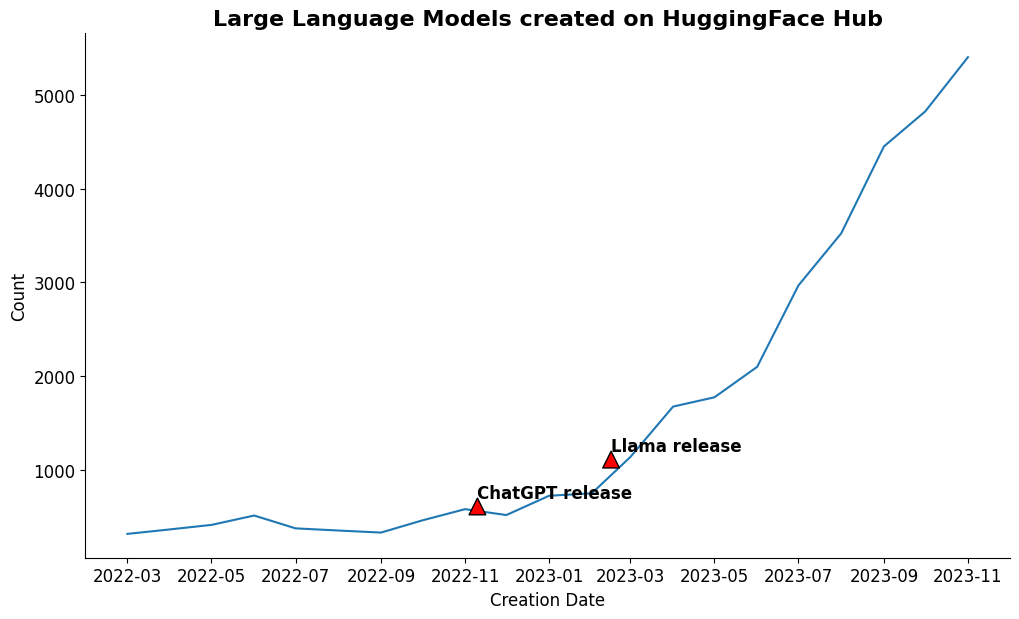

In [109]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=llm_creation_date_count_df, x='creation_date', y='count')
plt.annotate(
    'ChatGPT release', 
    xy=(chatgpt_relase_date, 700), 
    xytext=(chatgpt_relase_date, 700), 
    arrowprops=dict(facecolor='red', shrink=0.1),
    fontsize=12,  # Increase the font size
    fontweight='bold'
)
plt.annotate(
    'Llama release', 
    xy=(llama_relase_date, 1200), 
    xytext=(llama_relase_date, 1200), 
    arrowprops=dict(facecolor='red', shrink=0.1),
    fontsize=12,  # Increase the font size
    fontweight='bold'
)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Display the legend
# Optionally, add titles and labels
plt.title(
    "Large Language Models created on HuggingFace Hub",
    fontsize=16, fontweight='bold'
)
plt.xlabel(
    "Creation Date",
    fontsize=12, 
    # fontweight='bold'
)
plt.ylabel(
    "Count",
    fontsize=12, 
    # fontweight='bold'
)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout(pad=0) 
plt.savefig("huggingface_creation_date_count.png", dpi=800)